In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head(1)

,YearsExperience,Salary
0,1.1,39343.0


In [3]:
data.shape

(30, 2)

In [4]:
data.info()
#we have all non null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


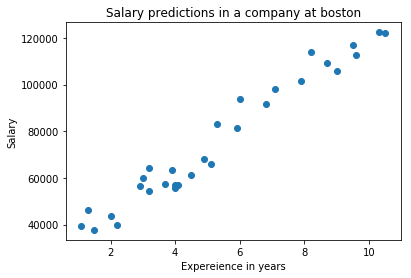

In [7]:
x = data['YearsExperience']
y = data['Salary']
plt.scatter(x,y)
plt.xlabel('Expereience in years')
plt.ylabel('Salary')
plt.title('Salary predictions in a company at boston')
plt.show()

In [8]:

np.corrcoef(x,y)


array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [9]:


x.mean()

5.3133333333333335

In [10]:
np.mean(x)


5.3133333333333335

In [11]:
y.mean()

76003.0

In [12]:


from sklearn.linear_model import LinearRegression

C:\Users\mahidhai\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [25]:
X = data[ ['YearsExperience']]
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [26]:
Y = data[[ 'Salary']]


In [27]:
lr = LinearRegression().fit(X,Y)


In [28]:
lr.score(X,Y)


0.9569566641435084

In [29]:

c = lr.intercept_
c


array([25792.20019867])

In [31]:
m = lr.coef_
m

array([[9449.96232146]])

In [66]:

data['Pre_Salary'] = lr.predict(X)
y_p = data['Pre_Salary']

In [34]:
data.head()

,YearsExperience,Salary,Pre_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [40]:

data[ 'err'] = y - y_p
error = data['err']


In [41]:
data.head(3)

,YearsExperience,Salary,Pre_Salary,err
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681


In [43]:

data['residuals'] = data.apply(lambda sq: sq['err']*sq['err'], axis =1)

In [44]:
data['residuals2'] = error*error

In [46]:
res = data['residuals']
res.mean()

31270951.722280968

In [47]:
data.columns = [ 'YearsExperience' , 'Salary' , 'Pre_Salary' , 'residuals' , 'sq_residuals' , 'sq_residuals2']


In [48]:
data.head(1)

,YearsExperience,Salary,Pre_Salary,residuals,sq_residuals,sq_residuals2
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06,9.959334e+06


In [62]:

del data['sq_residuals2']


In [64]:
y.mean()


76003.0

In [67]:
y_p.mean()

76003.0

In [68]:
data['mean_salary'] = 76003.0

In [69]:
data['err'] = data['Salary'] -data['mean_salary']


In [70]:
data['sq_err'] = data['err']*data['err']

In [71]:
data.head(1)

,YearsExperience,Salary,Pre_Salary,residuals,sq_residuals,mean_salary,err,sq_err
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06,76003.0,-36660.0,1.343956e+09


In [72]:

SST = np.sum(data['sq_err'])
SST

21794977852.0

In [74]:
SSE = np.sum(data['sq_residuals'])
SSE

938128551.668429

In [77]:
SSR = SST-SSE
SSR

20856849300.33157

In [78]:
a_sq = SSR/SST


a_sq

0.9569566641435084

In [79]:
acc = lr.score(X,Y)
acc

0.9569566641435084

In [80]:
a_sq -acc

0.0

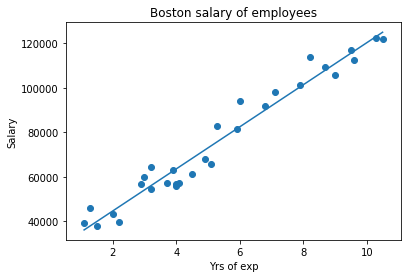

In [94]:

x = np.array(data['YearsExperience'])
y_pred =  m * x + c
y = np.array(y_pred)
plt.plot(x,y)
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('Yrs of exp')
plt.ylable('Salary')
plt.title('Boston salary of employees')
plt.show()



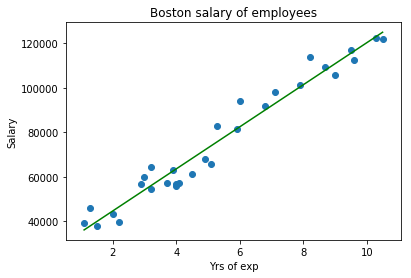

In [110]:
x = np.array(data['YearsExperience'])
y_pred =  (m.reshape(1,)[0]) * x + c[0]
y = np.array(y_pred)
plt.plot(x,y,color ='green')
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('Yrs of exp')
plt.ylabel('Salary')
plt.title('Boston salary of employees')
plt.show()